In [1]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report,f1_score,recall_score

# Data Importing and Analysis

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


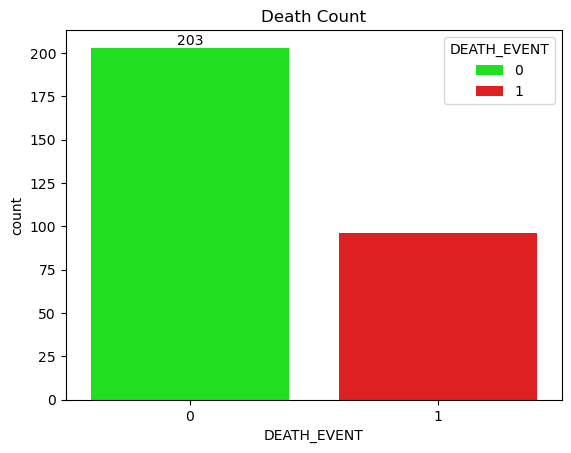

In [5]:
cols = ["#00ff00","#ff0000"]
ax = sns.countplot(x=data["DEATH_EVENT"],hue=data['DEATH_EVENT'],palette=cols)
ax.bar_label(ax.containers[0])
plt.title('Death Count')
plt.show()

In [6]:
data.describe().T   #T for transposing the DataFrame

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


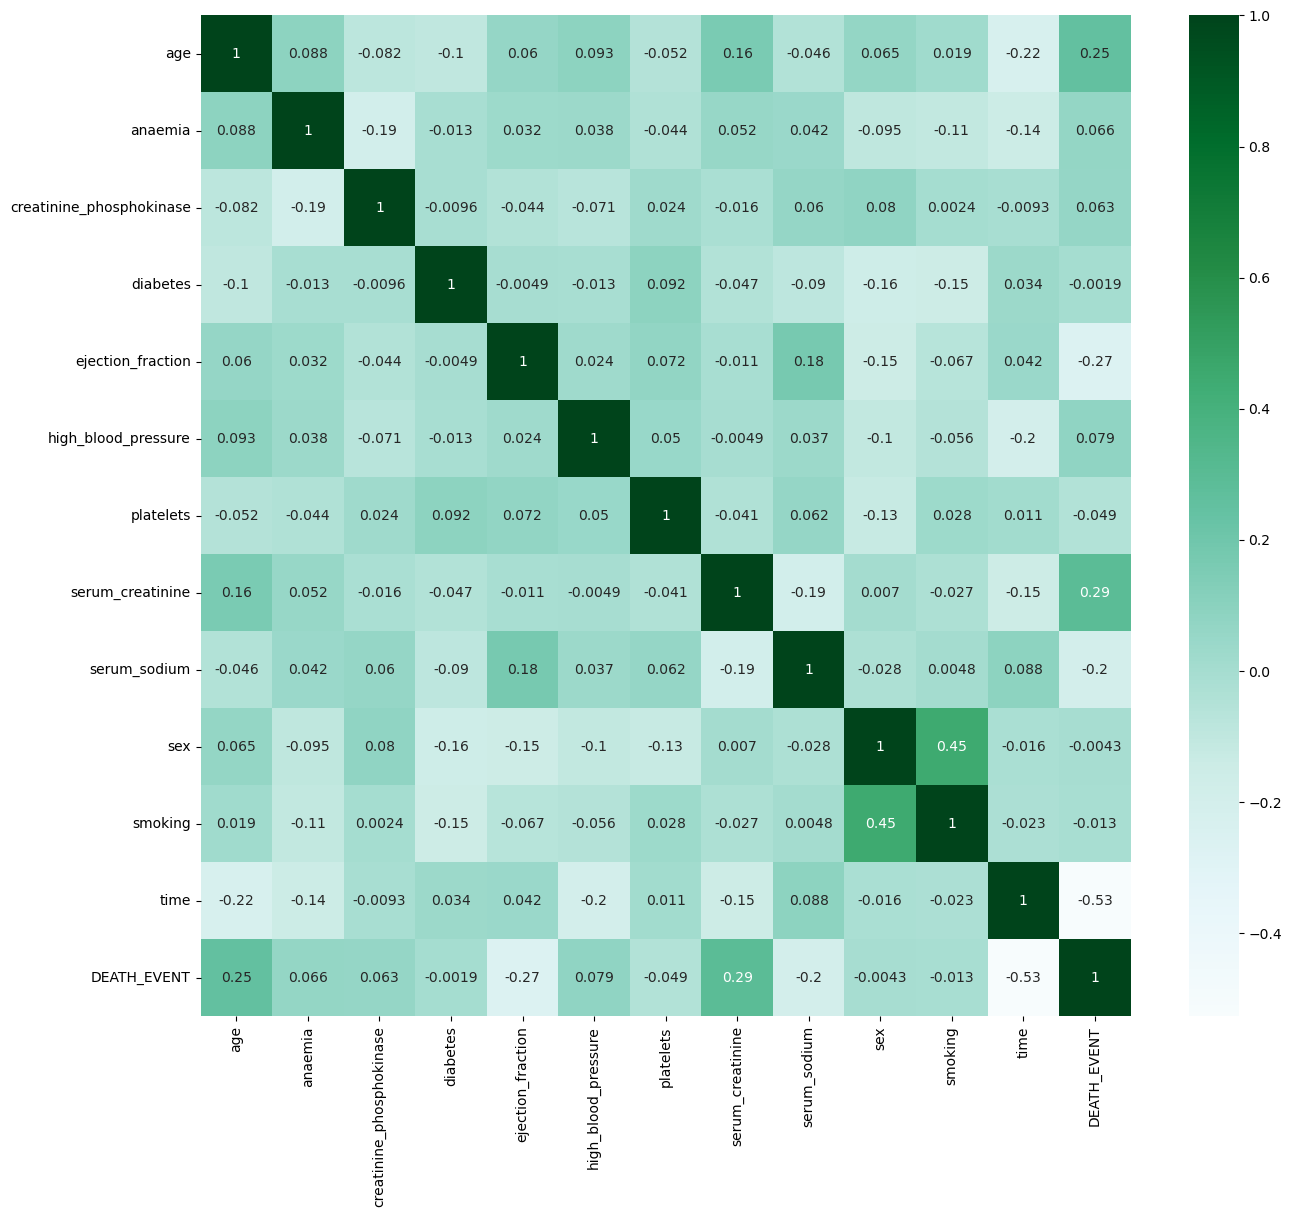

In [7]:
plt.subplots(figsize=(15,13))
sns.heatmap(data.corr(), cmap="BuGn", annot=True)
plt.show()

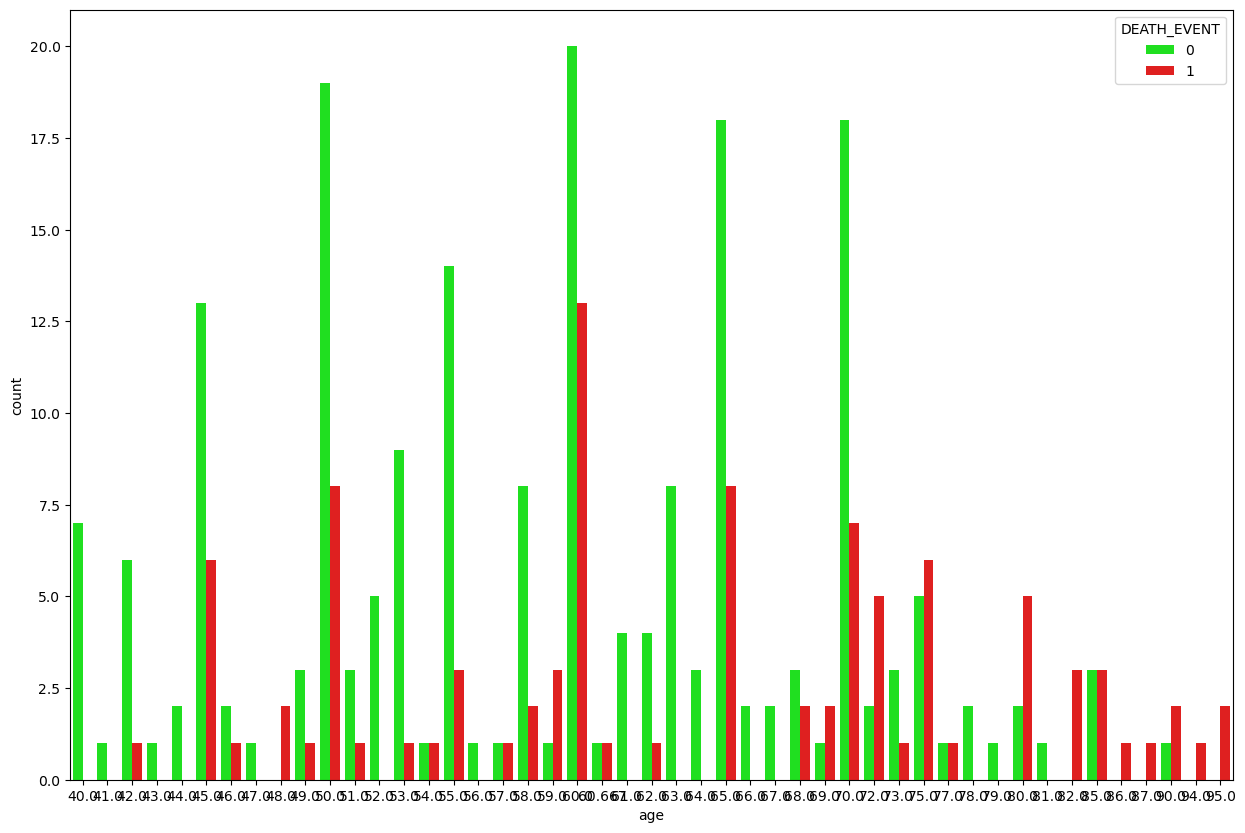

In [8]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x="age", data=data, hue="DEATH_EVENT", palette=cols)

In [9]:
features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine",
            "serum_sodium", "time"]

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)


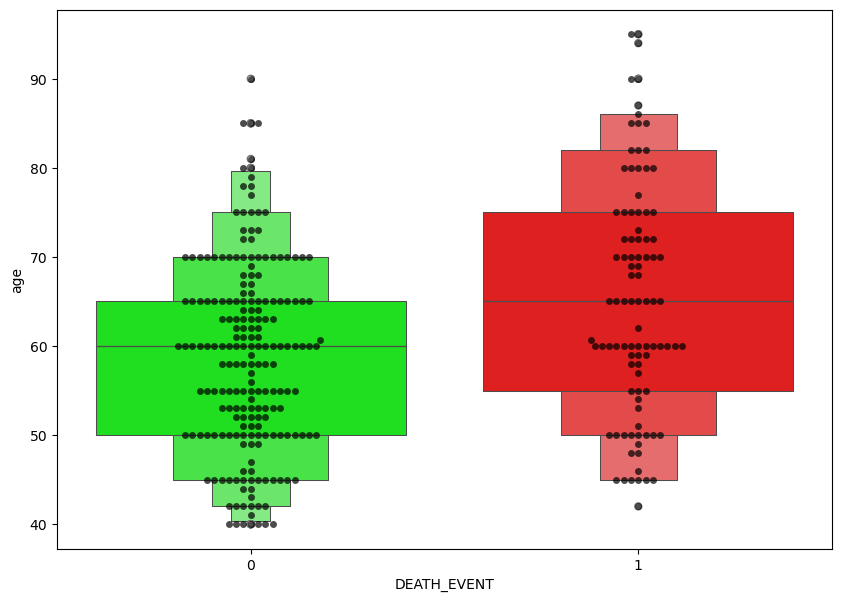

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


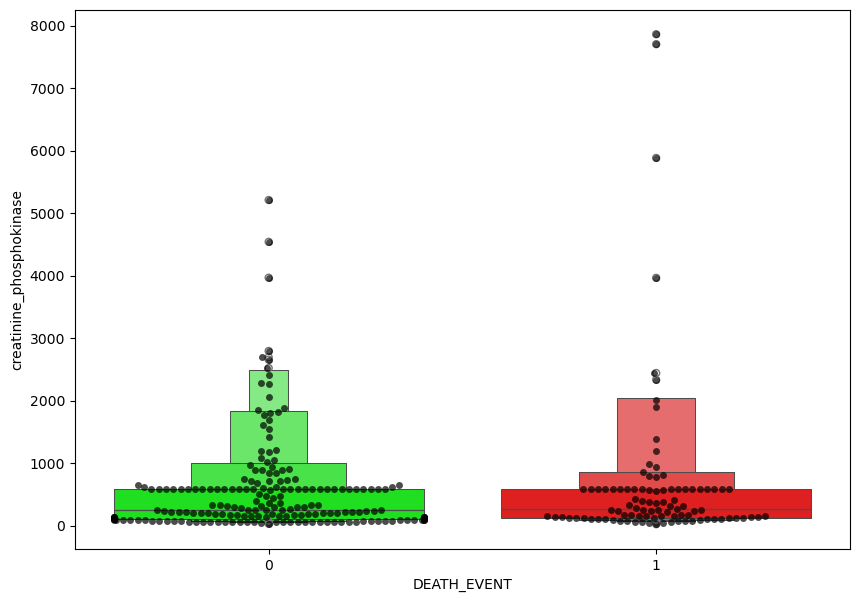

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)


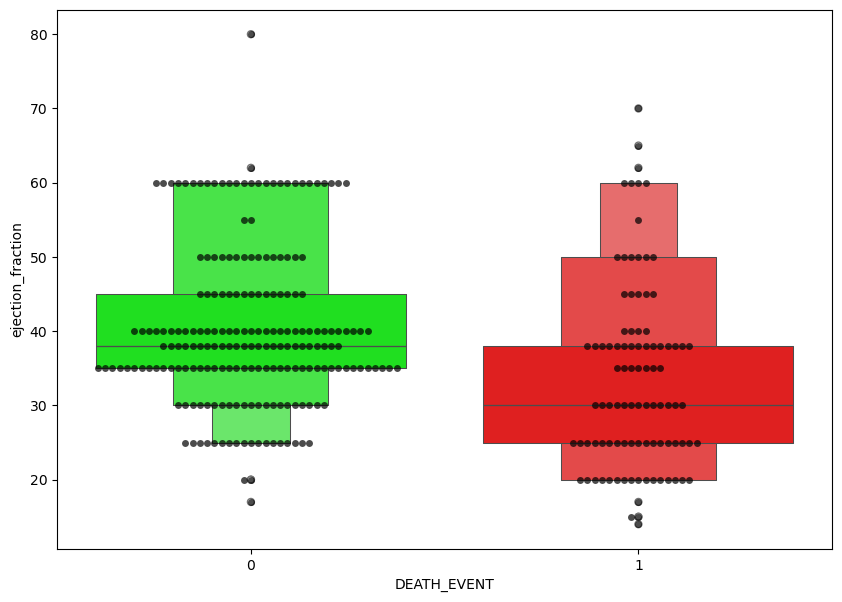

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)


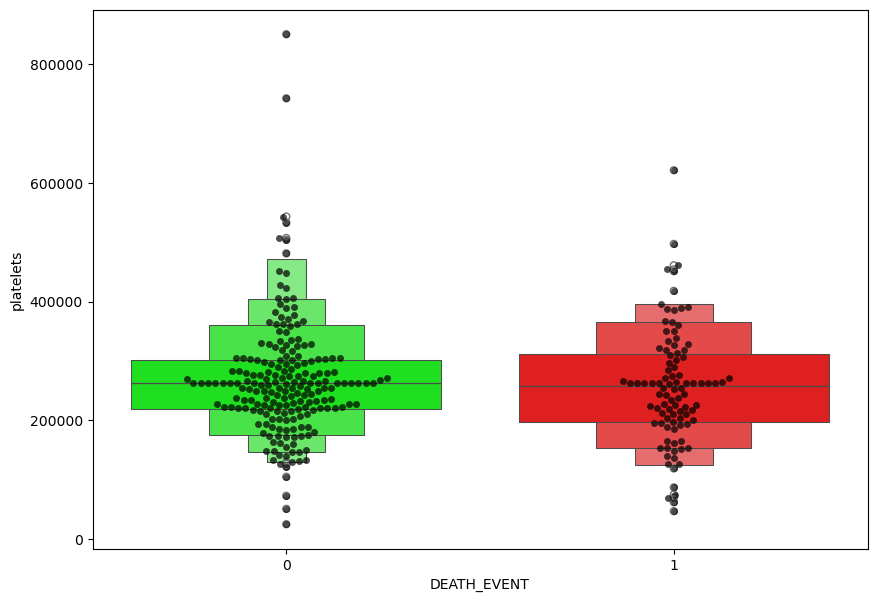

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)
C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


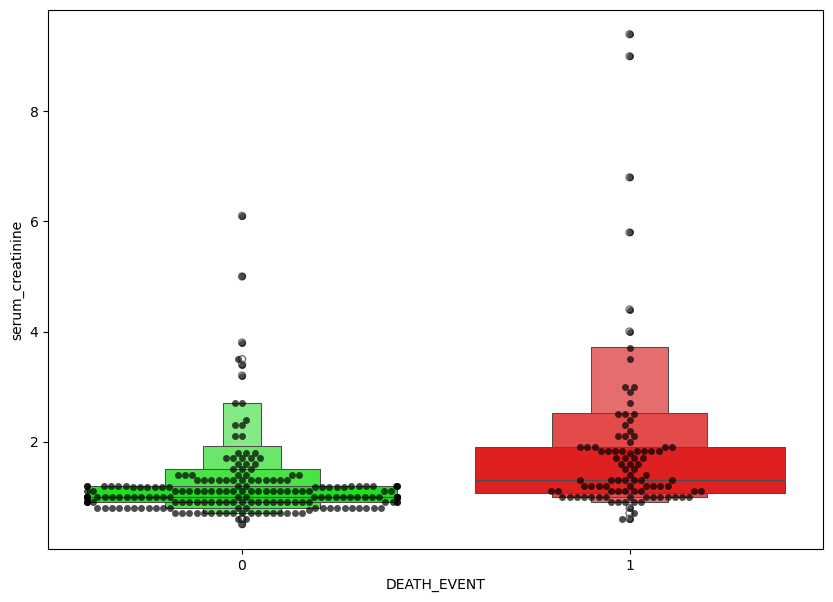

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)


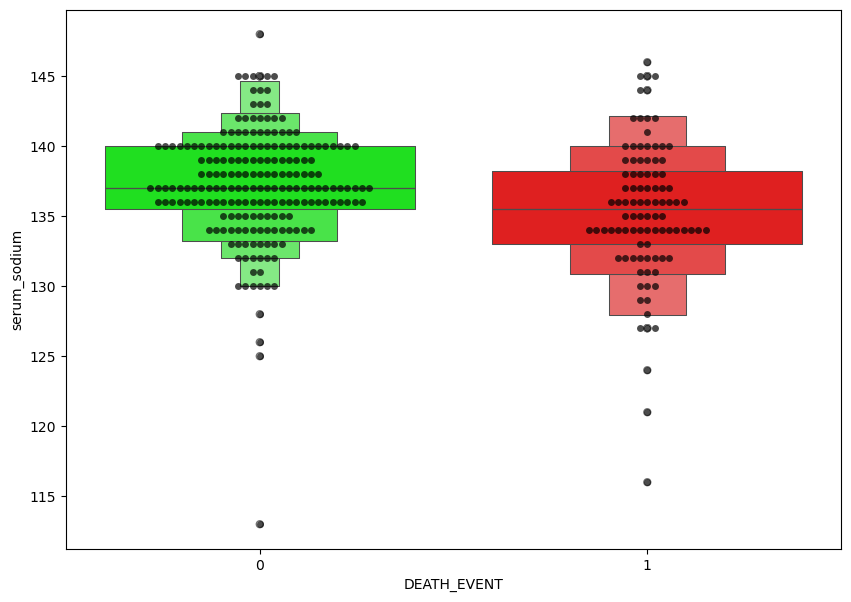

C:\Users\vijay\AppData\Local\Temp\ipykernel_10000\4142775696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)


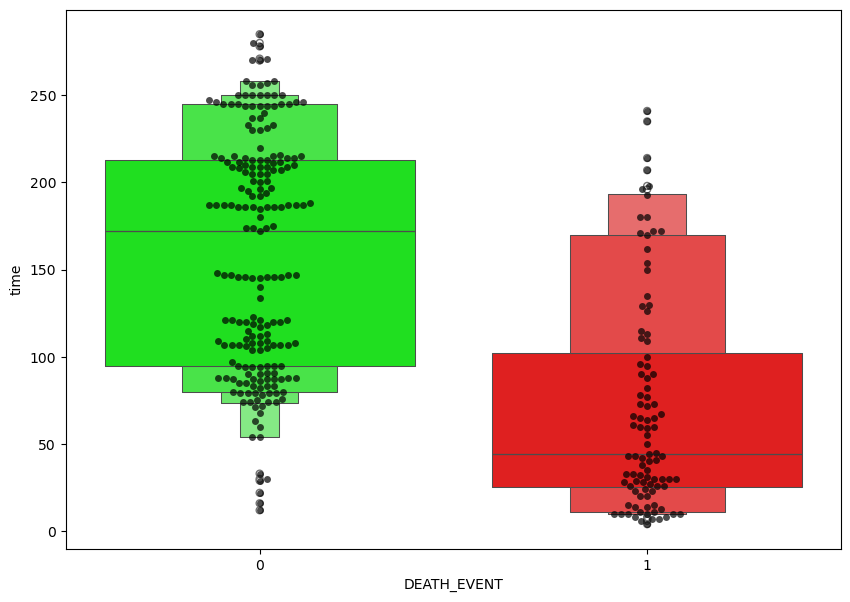

In [10]:
for i in features:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data["DEATH_EVENT"], y = data[i], color = "black", alpha = 0.7)
    sns.boxenplot(x=data["DEATH_EVENT"], y = data[i], palette=cols)
    plt.show()

# Data Preprocessing

In [11]:
X = data.drop(["DEATH_EVENT"], axis=1)
y = data["DEATH_EVENT"]

In [12]:
col_name = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=col_name)

In [13]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


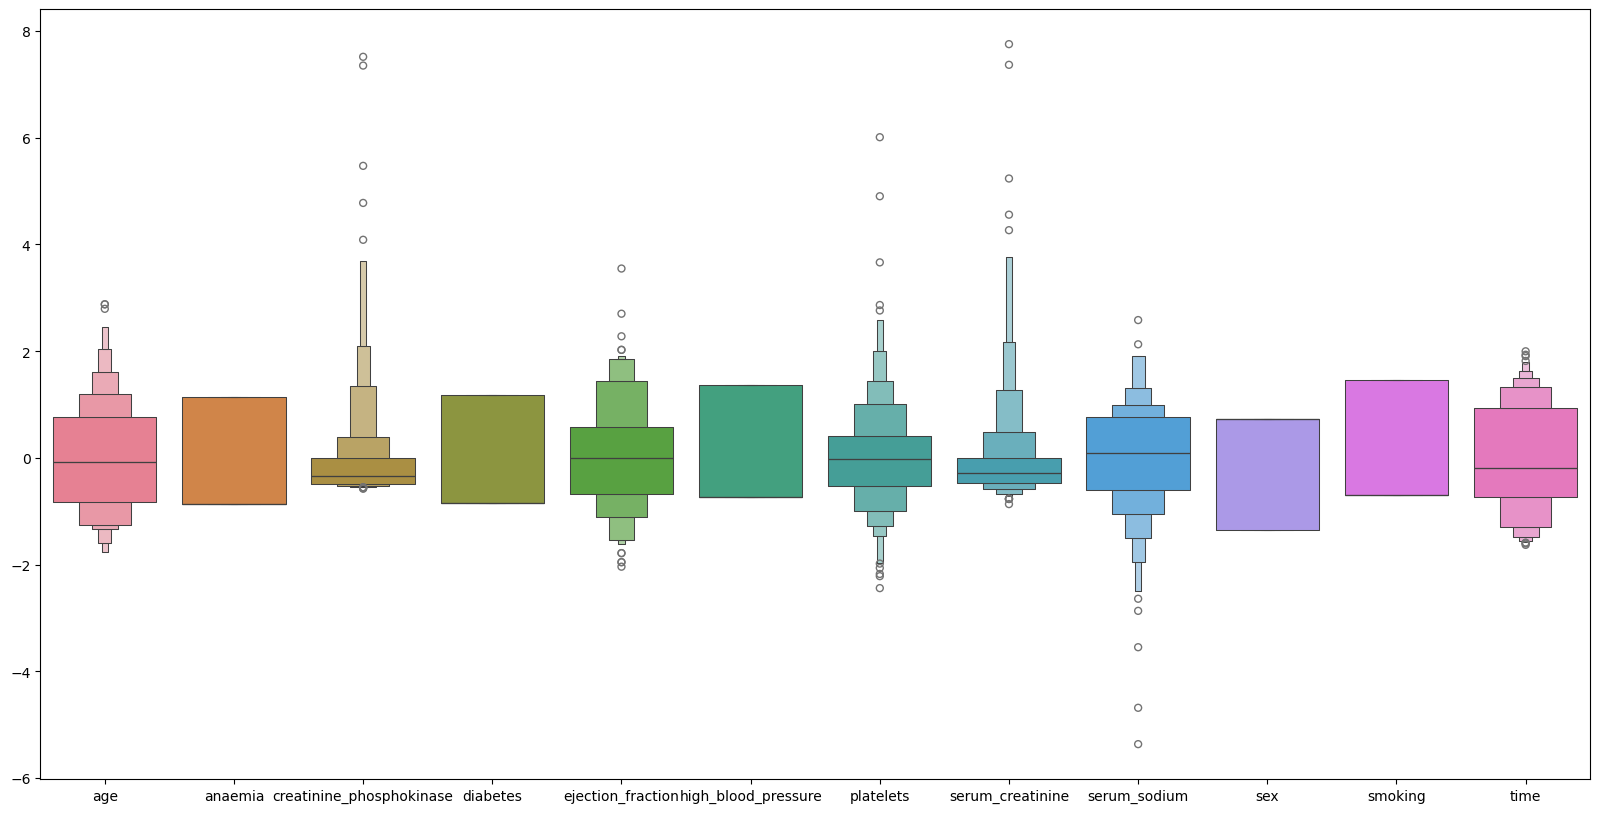

In [14]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)

# Model Building

### 1. SVM

In [16]:
model1 = svm.SVC()

In [17]:
model1.fit(X_train,y_train)

SVC()

In [18]:
y_pred = model1.predict(X_test)

In [19]:
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]
250    0
132    0
246    1
164    1
278    0
      ..
184    1
258    0
55     1
289    0
232    0
Name: DEATH_EVENT, Length: 90, dtype: int64


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        56
           1       0.82      0.53      0.64        34

    accuracy                           0.78        90
   macro avg       0.79      0.73      0.74        90
weighted avg       0.78      0.78      0.76        90



### 2. ANN

In [21]:
# If the model is performing well before predefined iterations
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, patience = 20, restore_best_weights = True)

model = Sequential()

model.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))

C:\Users\vijay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train,y_train,batch_size=25,epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6814 - loss: 0.6929 - val_accuracy: 0.7547 - val_loss: 0.6914
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6756 - loss: 0.6916 - val_accuracy: 0.7547 - val_loss: 0.6897
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7364 - loss: 0.6896 - val_accuracy: 0.7547 - val_loss: 0.6876
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6872 - loss: 0.6887 - val_accuracy: 0.7547 - val_loss: 0.6857
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6758 - loss: 0.6875 - val_accuracy: 0.7547 - val_loss: 0.6832
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6746 - loss: 0.6856 - val_accuracy: 0.7547 - val_loss: 0.6802
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6731 - loss: 0.6835 - val_accuracy: 0.7547 - val_loss: 0.6764
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6642 - loss: 0.6817 - val_accuracy: 0.7547 - val_loss:

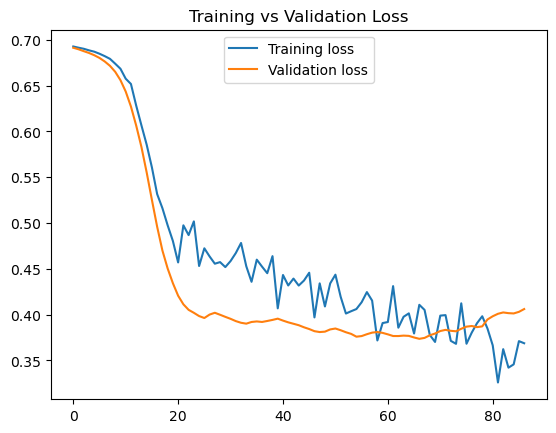

In [29]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:,['loss']],label = "Training loss")
plt.plot(history_df.loc[:,['val_loss']],label = "Validation loss")
plt.legend(loc=9)
plt.title("Training vs Validation Loss")
plt.show()

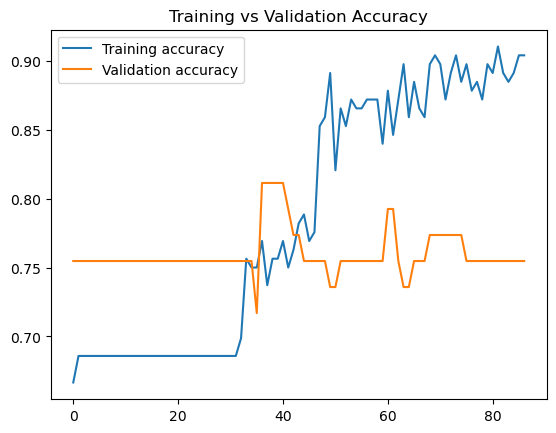

In [31]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:,['accuracy']],label = "Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']],label = "Validation accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [33]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [34]:
y_pred = (y_pred>0.5)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        56
           1       0.86      0.56      0.68        34

    accuracy                           0.80        90
   macro avg       0.82      0.75      0.77        90
weighted avg       0.81      0.80      0.79        90

